In [3]:
# Import libraries and dependencies
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from MCForecastTools import MCSimulation

In [4]:
data = yf.download(  # or pdr.get_data_yahoo(...
        # tickers list or string as well
        tickers = ["BTC-USD", "ETH-USD"],

        # use "period" instead of start/end
        # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
        # (optional, default is '1mo')
        period = "7y",

        # fetch data by interval (including intraday if period < 60 days)
        # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
        # (optional, default is '1d')
        interval = "1d",

        # group by ticker (to access via data['SPY'])
        # (optional, default is 'column')
        group_by = 'ticker',

        # adjust all OHLC automatically
        # (optional, default is False)
        auto_adjust = True,

        # download pre/post regular market hours data
        # (optional, default is False)
        prepost = True,

        # use threads for mass downloading? (True/False/Integer)
        # (optional, default is True)
        threads = True,

        # proxy URL scheme use use when downloading?
        # (optional, default is None)
        proxy = None
    )

[*********************100%***********************]  2 of 2 completed


In [5]:
data.index = pd.to_datetime(data.index)
data.head()

ETH-USD                           BTC-USD                          \
              Open High Low Close Volume        Open        High         Low   
Date                                                                           
2014-09-17     NaN  NaN NaN   NaN    NaN  465.864014  468.174011  452.421997   
2014-09-18     NaN  NaN NaN   NaN    NaN  456.859985  456.859985  413.104004   
2014-09-19     NaN  NaN NaN   NaN    NaN  424.102997  427.834991  384.532013   
2014-09-20     NaN  NaN NaN   NaN    NaN  394.673004  423.295990  389.882996   
2014-09-21     NaN  NaN NaN   NaN    NaN  408.084991  412.425995  393.181000   

                                  
                 Close    Volume  
Date                              
2014-09-17  457.334015  21056800  
2014-09-18  424.440002  34483200  
2014-09-19  394.795990  37919700  
2014-09-20  408.903992  36863600  
2014-09-21  398.821014  26580100

In [12]:
data=data.dropna()
MC_even_dist = MCSimulation(
    portfolio_data = data,
    weights = [0,1],
    num_simulation = 1000,
    num_trading_days = 252*10
)
MC_even_dist.portfolio_data.head()

ETH-USD                                                        \
                Open      High       Low     Close     Volume daily_return   
Date                                                                         
2015-08-07  2.831620  3.536610  2.521120  2.772120   164329.0          NaN   
2015-08-08  2.793760  2.798810  0.714725  0.753325   674188.0    -0.728250   
2015-08-09  0.706136  0.879810  0.629191  0.701897   532170.0    -0.068268   
2015-08-10  0.713989  0.729854  0.636546  0.708448   405283.0     0.009333   
2015-08-11  0.708087  1.131410  0.663235  1.067860  1463100.0     0.507323   

               BTC-USD                                                \
                  Open        High         Low       Close    Volume   
Date                                                                   
2015-08-07  278.740997  280.391998  276.365997  279.584991  42484800   
2015-08-08  279.742004  279.928009  260.709991  260.997009  58533000   
2015-08-09  261.115997  267.002991  260.467987  265.083008  23789600   
2015-08-10  265.477997  267.032013  262.596008  264.470001  20979400   
2015-08-11  264.342010  270.385986  264.093994  270.385986  25433900   

                         
           daily_return  
Date                     
2015-08-07          NaN  
2015-08-08    -0.066484  
2015-08-09     0.015655  
2015-08-10    -0.002313  
2015-08-11     0.022369

In [13]:
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.018342,1.016292,1.009369,0.992497,0.994024,0.949736,0.923405,1.009471,0.996040,1.036621,...,1.009453,1.002908,0.956826,0.988875,1.065908,1.010218,1.016261,1.073033,1.022864,0.978158
2,1.038826,0.964330,1.059046,1.012677,0.988424,0.919996,0.958527,1.002025,1.003985,1.095445,...,1.013076,1.022597,0.940738,0.951954,1.050881,1.009052,1.010439,1.072949,1.046168,1.033535
3,1.053193,0.978636,1.115019,1.031203,0.961723,0.979258,0.951378,0.949754,0.981489,1.160417,...,1.045338,0.955377,0.844534,0.978625,1.002074,1.020408,1.021264,1.020385,1.036389,1.009938
4,0.965088,0.945470,1.157909,0.951817,0.926908,0.997244,0.933864,0.910800,0.942274,1.160740,...,1.006424,0.992014,0.836327,0.996009,1.042515,1.067368,0.976892,0.951628,1.026367,1.065589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,123.234482,26.545676,17.991991,21.026651,16.790957,66.855981,19.063118,49.360292,82.524789,24.614821,...,111.876720,15.844544,28.138196,32.373405,9.022959,2.110312,305.354731,3.587409,163.349806,7.302228
1257,115.068765,27.701032,16.798052,21.200241,17.497817,65.526663,18.361927,48.947363,86.514278,24.825080,...,116.161289,15.042526,27.689263,33.907659,9.029467,2.150693,309.383032,3.609684,157.603420,7.444514
1258,107.757287,28.631877,16.078205,23.560419,17.127259,65.959085,17.197035,52.118556,86.723693,24.513773,...,120.453287,15.723408,27.701056,33.304397,8.718234,2.261063,333.420663,3.654905,163.831787,7.083561
1259,115.095943,27.484370,14.824108,21.830014,16.953025,64.390835,17.273803,51.153718,88.308758,25.979617,...,120.449923,16.105695,26.952933,31.391832,8.656334,2.454230,330.130533,3.588384,165.503288,7.437217


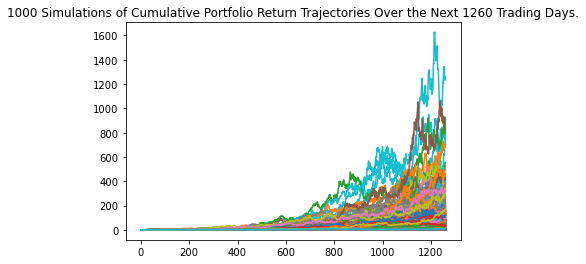

In [14]:
# Plot simulation outcomes
line_plot = MC_even_dist.plot_simulation()

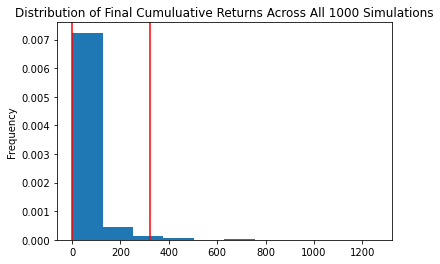

In [15]:
# Plot probability distribution and confidence intervals
att_dist_plot = MC_even_dist.plot_distribution()

In [16]:
# Fetch summary statistics from the Monte Carlo simulation results
att_tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(att_tbl)

count           1000.000000
mean              47.451246
std               99.390800
min                0.180036
25%                5.983222
50%               17.350900
75%               43.286626
max             1258.914441
95% CI Lower       0.961876
95% CI Upper     321.397327
Name: 1260, dtype: float64


In [32]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $15,000 investments
att_ci_lower = round(att_tbl[8]*15000,5)
att_ci_upper = round(att_tbl[9]*15000,5)

# Print results
print(f"There is a 95% chance that an initial investment of $15,000 in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${att_ci_lower} and ${att_ci_upper}.")

There is a 95% chance that an initial investment of $15,000 in the portfolio over the next 10 years will end within in the range of $663351.49048 and $8611198462.57426.


In [18]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
data=data.dropna()
MC_even_dist = MCSimulation(
    portfolio_data = data,
    weights = [0,1],
    num_simulation = 1000,
    num_trading_days = 252*5
)
MC_even_dist.portfolio_data.head()

ETH-USD                                                        \
                Open      High       Low     Close     Volume daily_return   
Date                                                                         
2015-08-07  2.831620  3.536610  2.521120  2.772120   164329.0          NaN   
2015-08-08  2.793760  2.798810  0.714725  0.753325   674188.0    -0.728250   
2015-08-09  0.706136  0.879810  0.629191  0.701897   532170.0    -0.068268   
2015-08-10  0.713989  0.729854  0.636546  0.708448   405283.0     0.009333   
2015-08-11  0.708087  1.131410  0.663235  1.067860  1463100.0     0.507323   

               BTC-USD                                                \
                  Open        High         Low       Close    Volume   
Date                                                                   
2015-08-07  278.740997  280.391998  276.365997  279.584991  42484800   
2015-08-08  279.742004  279.928009  260.709991  260.997009  58533000   
2015-08-09  261.115997  267.002991  260.467987  265.083008  23789600   
2015-08-10  265.477997  267.032013  262.596008  264.470001  20979400   
2015-08-11  264.342010  270.385986  264.093994  270.385986  25433900   

                         
           daily_return  
Date                     
2015-08-07          NaN  
2015-08-08    -0.066484  
2015-08-09     0.015655  
2015-08-10    -0.002313  
2015-08-11     0.022369

In [19]:
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998697,0.976626,1.026401,0.994372,0.957092,0.996873,0.987029,0.982929,1.024099,0.980501,...,0.929240,0.984764,1.037287,0.954165,0.998376,1.073406,1.004630,1.066861,0.980499,1.079632
2,1.040787,1.000249,1.023578,0.997862,0.937945,0.982481,1.006161,0.952557,0.994298,0.969430,...,0.915708,1.005182,0.977330,0.954333,1.060715,1.056831,1.010198,1.027495,0.928015,1.019335
3,1.068740,0.916672,1.029988,1.002052,0.919032,0.957816,1.072445,0.965042,1.022654,0.962380,...,0.859013,0.979682,1.036169,0.975358,1.090561,1.152098,1.016812,0.966738,0.959982,1.015055
4,1.028631,0.911338,1.074408,0.960357,0.884696,0.897641,1.053303,0.959066,1.035965,0.989431,...,0.772762,0.965504,1.001796,0.949698,1.122547,1.164833,1.062663,0.933011,0.915717,1.000648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,42.530598,6.328355,8.182796,81.970273,89.191509,245.151468,31.758223,7.348212,4.238586,16.468604,...,28.696312,14.518360,63.349804,32.899979,42.859467,1.847302,142.425343,21.473407,49.923048,52.488829
1257,45.644043,6.099447,7.573850,84.674508,87.356494,227.003619,30.801153,7.250322,4.189532,16.283254,...,29.730789,14.656869,62.752169,33.806883,41.239019,1.875344,150.684682,20.970676,49.822215,50.929441
1258,44.502215,6.104249,7.586571,81.320264,84.004668,223.655459,29.167697,7.308750,4.186271,15.292239,...,27.926869,14.471067,64.963365,32.559499,38.770709,1.850091,147.717136,20.892336,48.319739,51.116650
1259,45.675023,6.660217,8.038489,80.459570,80.445128,224.610514,29.834055,7.212956,3.798926,15.374221,...,27.919887,15.282542,62.517578,32.725902,41.501311,1.957993,148.293146,19.842479,52.258861,52.144017


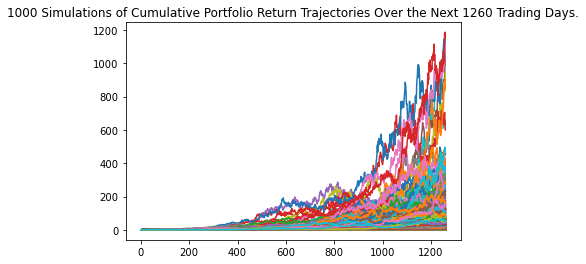

In [20]:
# Plot simulation outcomes
line_plot = MC_even_dist.plot_simulation()

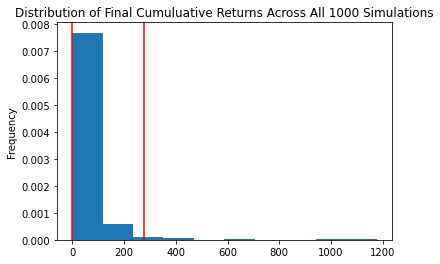

In [21]:
# Plot probability distribution and confidence intervals
att_dist_plot = MC_even_dist.plot_distribution()

In [22]:
# Fetch summary statistics from the Monte Carlo simulation results
att_tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(att_tbl)

count           1000.000000
mean              47.930273
std              103.706389
min                0.197882
25%                6.502571
50%               17.517298
75%               46.759181
max             1175.324218
95% CI Lower       0.837246
95% CI Upper     278.525102
Name: 1260, dtype: float64


In [23]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $15,000 investments
att_ci_lower = round(att_tbl[8]*15000,5)
att_ci_upper = round(att_tbl[9]*15000,5)

# Print results
print(f"There is a 95% chance that an initial investment of $15,000 in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${att_ci_lower} and ${att_ci_upper}.")

There is a 95% chance that an initial investment of $15,000 in the portfolio over the next 5 years will end within in the range of $12558.69563 and $4177876.53662.


In [24]:
# Running a Monte Carlo simulation to forecast 15 years cumulative returns
data=data.dropna()
MC_even_dist = MCSimulation(
    portfolio_data = data,
    weights = [0,1],
    num_simulation = 1000,
    num_trading_days = 252*15
)
MC_even_dist.portfolio_data.head()

ETH-USD                                                        \
                Open      High       Low     Close     Volume daily_return   
Date                                                                         
2015-08-07  2.831620  3.536610  2.521120  2.772120   164329.0          NaN   
2015-08-08  2.793760  2.798810  0.714725  0.753325   674188.0    -0.728250   
2015-08-09  0.706136  0.879810  0.629191  0.701897   532170.0    -0.068268   
2015-08-10  0.713989  0.729854  0.636546  0.708448   405283.0     0.009333   
2015-08-11  0.708087  1.131410  0.663235  1.067860  1463100.0     0.507323   

               BTC-USD                                                \
                  Open        High         Low       Close    Volume   
Date                                                                   
2015-08-07  278.740997  280.391998  276.365997  279.584991  42484800   
2015-08-08  279.742004  279.928009  260.709991  260.997009  58533000   
2015-08-09  261.115997  267.002991  260.467987  265.083008  23789600   
2015-08-10  265.477997  267.032013  262.596008  264.470001  20979400   
2015-08-11  264.342010  270.385986  264.093994  270.385986  25433900   

                         
           daily_return  
Date                     
2015-08-07          NaN  
2015-08-08    -0.066484  
2015-08-09     0.015655  
2015-08-10    -0.002313  
2015-08-11     0.022369

In [25]:
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000
1,1.037184,0.970873,0.945201,0.958483,0.971021,1.002766,0.925778,1.043073,0.977654,0.976120,...,1.024598,1.070511,0.985944,1.005975,0.994164,1.013966,1.045197,1.076825,9.563277e-01,0.991093
2,1.100912,0.940947,0.982488,1.029737,0.989355,1.014181,0.914570,0.964340,0.998966,0.942722,...,0.969022,1.112448,0.926090,1.047838,1.030303,0.981176,1.019124,1.122154,9.836413e-01,0.926055
3,1.162298,0.941149,0.965752,1.030780,0.955680,0.983724,0.940321,0.929328,1.002553,0.968197,...,0.976762,1.107678,0.899706,1.074624,1.115945,0.952529,0.974702,1.131057,1.034035e+00,0.936963
4,1.193523,0.962935,0.989274,1.104029,1.026137,0.932405,0.946414,0.950287,1.008241,0.971422,...,0.956812,1.143607,0.894951,1.156762,1.126787,0.962913,0.961947,1.118330,1.030845e+00,0.959187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3776,116506.402469,3821.918539,1384.606413,187.318826,3874.038542,184.446015,9953.692416,11255.628049,645.086321,3255.668931,...,32.410885,2071.516486,685.673028,2610.145115,41697.449319,737.788856,8687.492450,31710.254528,1.877881e+06,365.998645
3777,116706.749142,3833.145213,1345.761909,190.492955,3676.359323,190.463435,9671.121904,11890.825718,694.609686,3489.282827,...,33.653710,1975.699871,676.459170,2358.482947,42866.778835,738.449076,8323.589667,31785.621372,1.928659e+06,354.424731
3778,119674.290917,3867.814924,1378.777445,203.778920,3819.476230,190.775806,9278.385692,11114.444477,670.658915,3668.964538,...,32.434691,1948.524793,650.194656,2360.972512,44601.265892,703.290719,8717.459477,32208.030363,1.949251e+06,356.991828
3779,116553.507110,3810.043634,1353.068520,210.435283,3948.066354,187.345268,9343.640125,11236.887176,682.142555,3618.139872,...,32.130730,1945.591347,633.205432,2237.427293,44306.781587,690.783909,8665.798965,31416.317000,2.041801e+06,362.471564


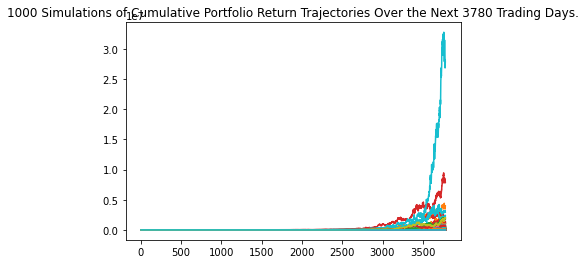

In [26]:
# Plot simulation outcomes
line_plot = MC_even_dist.plot_simulation()

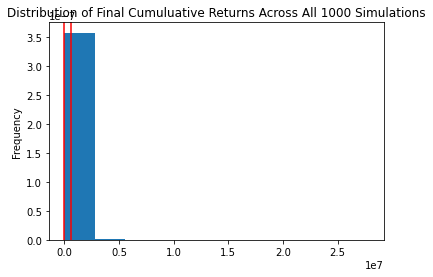

In [27]:
# Plot probability distribution and confidence intervals
att_dist_plot = MC_even_dist.plot_distribution()

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
att_tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(att_tbl)

count           1.000000e+03
mean            9.879966e+04
std             9.467301e+05
min             1.147784e+00
25%             9.186324e+02
50%             4.945284e+03
75%             2.667335e+04
max             2.785225e+07
95% CI Lower    4.422343e+01
95% CI Upper    5.740799e+05
Name: 3780, dtype: float64


In [31]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $15,000 investments
att_ci_lower = round(att_tbl[8]*15000,2)
att_ci_upper = round(att_tbl[9]*15000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $15,000 in the portfolio"
      f" over the next 15 years will end within in the range of"
      f" ${att_ci_lower} and ${att_ci_upper}.")

There is a 95% chance that an initial investment of $15,000 in the portfolio over the next 15 years will end within in the range of $663351.49 and $8611198462.57.
